In [1]:
import sympy
sympy.init_printing()
from IPython.display import display
import numpy
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

# Harmonic oscillator

In [4]:
q = sympy.Symbol('q')
p = sympy.Symbol('p')
x = [q, p]

J = sympy.Matrix([[0, 1], [-1, 0]])

m = sympy.Symbol('m')
k = sympy.Symbol('k')
params = {m: 0.1,
          k: 3.0,
         }
H = sympy.Rational(1,2) * p * 1/m * p + sympy.Rational(1, 2) * q * k * q
dH = sympy.Matrix([H.diff(co) for co in x])
F = J @ dH

x_0 = numpy.array([numpy.pi/6, 0.0], dtype=float)
t_f = 30.0
dt = 5e-2
s = 2

In [5]:
%time time, solution = gauss_legendre(x, F, x_0, t_f, dt, s, params=params)

CPU times: user 220 ms, sys: 3.38 ms, total: 224 ms
Wall time: 225 ms


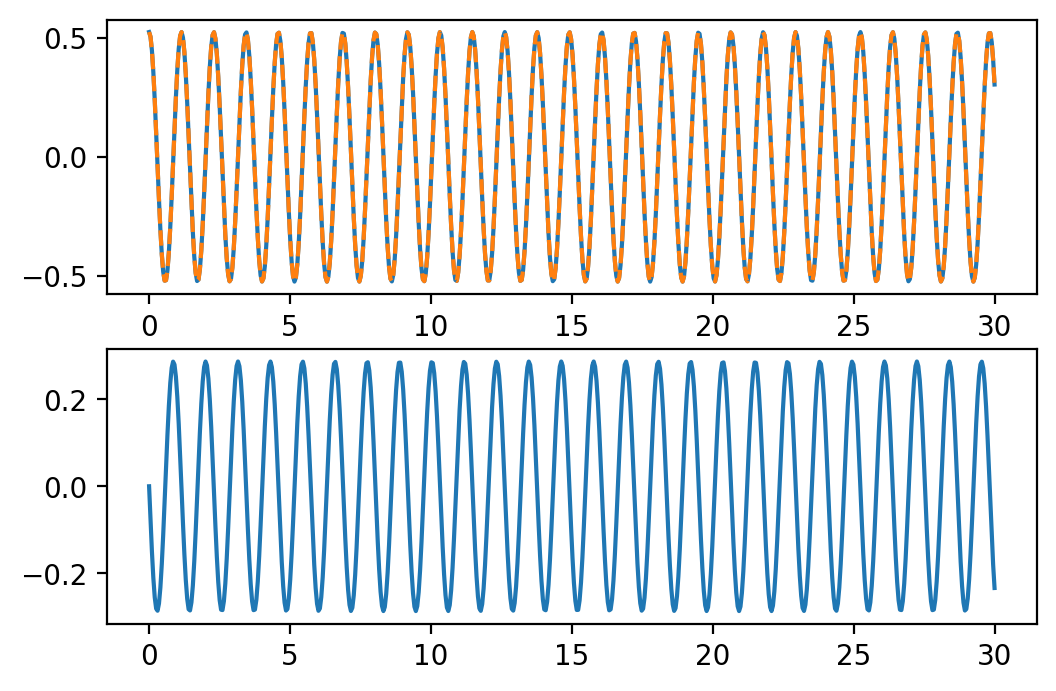

In [6]:
fig, ax = plt.subplots(nrows=2, dpi=200)
ax[0].plot(time, solution[:, 0])
ax[1].plot(time, solution[:, 1]);

#analytical solution
ω = numpy.sqrt(params[k] / params[m])
ax[0].plot(time, solution[0,0]*numpy.cos(time*ω), '--')

In [7]:
energy = evaluate_functional(x, H, solution, params=params)
energy[-1] - energy[0]